# Advanced Data Analytics for Insightful E-commerce Business Strategy

In [22]:
import pandas as pd
import os

path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/E-COMMERCE'

# Try different encodings if 'ISO-8859-1' doesn't work
encoding_type = 'ISO-8859-1'
df = pd.read_csv(os.path.join(path,'fact_table.csv'), index_col=False)
df_customer = pd.read_csv(os.path.join(path, 'customer_dim.csv'), index_col=False, encoding=encoding_type)
df_item = pd.read_csv(os.path.join(path, 'item_dim.csv'), index_col=False, encoding=encoding_type)
df_store = pd.read_csv(os.path.join(path, 'store_dim.csv'), index_col=False, encoding=encoding_type)
df_time = pd.read_csv(os.path.join(path,'time_dim.csv'), index_col=False)
df_trans = pd.read_csv(os.path.join(path,'Trans_dim.csv'), index_col=False)


# Intial dataframe info checks

In [23]:
df.info

<bound method DataFrame.info of        payment_key coustomer_key time_key item_key store_key  quantity   unit  \
0             P026       C004510  T049189   I00177    S00307         1     ct   
1             P022       C008967  T041209   I00248    S00595         1  rolls   
2             P030       C007261   T03633   I00195    S00496         8     ct   
3             P032       C007048  T084631   I00131     S0086         8     ct   
4             P014       C006430  T071276   I00050    S00488         8   cans   
...            ...           ...      ...      ...       ...       ...    ...   
999995        P010       C003726   T09247   I00063    S00502         5   cans   
999996        P021       C002581  T023483   I00252    S00225         1     ct   
999997        P035       C006133  T039372   I00119    S00555         7     ct   
999998        P031       C008735  T097975   I00257    S00440         2     ct   
999999        P032       C004067  T018028   I00044    S00326        10   cans

In [24]:
df.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


In [25]:
df.shape

(1000000, 9)

In [26]:
# finding missing values
missing_count = df.isnull().sum()

In [27]:
missing_count

payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64

In [28]:
# printing the values from the column for the missing values
unique_values = df['unit'].unique()
print(unique_values)


['ct' 'rolls' 'cans' 'bottles' 'bags' 'oz' 'tubs' 'cartons' 'lb' 'tins'
 'ct.' 'pack' 'pk' 'bars' 'Bags' 'oz.' nan 'Ct' 'botlltes']


In [29]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [30]:
df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0


In [32]:
df_customer.info

<bound method DataFrame.info of      coustomer_key             name     contact_no            nid
0          C000001            sumit  8801920345851  7505075708899
1          C000002         tammanne  8801817069329  1977731324842
2          C000003    kailash kumar  8801663795774  3769494056318
3          C000004  bhagwati prasad  8801533627961  9378834712725
4          C000005             ajay  8801943715786  3540815556323
...            ...              ...            ...            ...
9186       C009187        smt radha  8801563029753  1057824928189
9187       C009188     tulsi sharma  8801794982266  7970880905205
9188       C009189        madhubala  8801890032435  3101930298150
9189       C009190       pintu devi  8801563290767  7234328323528
9190       C009191            roopa  8801524507359  5682728390307

[9191 rows x 4 columns]>

In [41]:
print("\nUnique names:", df_customer['name'].nunique())
print("Missing names:", df_customer['name'].isnull().sum())
print(df_customer['name'].value_counts())


Unique names: 4534
Missing names: 27
name
pooja           185
jyoti           117
neha             87
poonam           81
sunita           80
               ... 
kalpna singh      1
uma yadav         1
geeta saini       1
aazadi@jully      1
madhubala         1
Name: count, Length: 4534, dtype: int64


In [33]:
df_store.info

<bound method DataFrame.info of     store_key division  district                  upazila
0       S0001   SYLHET  HABIGANJ               AJMIRIGANJ
1       S0002   SYLHET  HABIGANJ                  BAHUBAL
2       S0003   SYLHET  HABIGANJ               BANIACHONG
3       S0004   SYLHET  HABIGANJ              CHUNARUGHAT
4       S0005   SYLHET  HABIGANJ           HABIGANJ SADAR
..        ...      ...       ...                      ...
721    S00722  BARISAL   BARISAL                    HIZLA
722    S00723  BARISAL   BARISAL  BARISAL SADAR (KOTWALI)
723    S00724  BARISAL   BARISAL              MEHENDIGANJ
724    S00725  BARISAL   BARISAL                   MULADI
725    S00726  BARISAL   BARISAL                 WAZIRPUR

[726 rows x 4 columns]>

In [34]:
df_item.info

<bound method DataFrame.info of     item_key                              item_name                desc  \
0     I00001             A&W Root Beer - 12 oz cans  a. Beverage - Soda   
1     I00002        A&W Root Beer Diet - 12 oz cans  a. Beverage - Soda   
2     I00003          Barq's Root Beer - 12 oz cans  a. Beverage - Soda   
3     I00004                       Cherry Coke 12oz  a. Beverage - Soda   
4     I00005               Cherry Coke Zero 12 pack  a. Beverage - Soda   
..       ...                                    ...                 ...   
259   I00260                   Napkins Square Lunch    Kitchen Supplies   
260   I00261                 POM 2 ply paper towels    Kitchen Supplies   
261   I00262                Strong Everyday Napkins    Kitchen Supplies   
262   I00263                   Advil 2 pill packets            Medicine   
263   I00264  Tylenol Extra Strength 2 pill packets            Medicine   

     unit_price  man_country                        supplier  unit 

In [51]:
# Summarizing item names
print("\nUnique item names:",df_item['item_name'].nunique())
print("Item name counts:")
print(df_item['item_name'].value_counts())

# Summarizing descriptions
print("\nDescriptions available:", df_item['desc'].nunique())
print("Top descriptions:")
print(df_item['desc'].value_counts().head())

# Displaying summary statistics for 'unit_price'
print("\nUnit Price Statistics:")
print(df_item['unit_price'].describe())

# Summarizing manufacturing countries
print("\nManufacturing Countries:", df_item['man_country'].nunique())
print("Manufacturing country counts:")
print(df_item['man_country'].value_counts())

# Summarizing suppliers
print("\nSuppliers:", df_item['supplier'].nunique())
print("Supplier counts:")
print(df_item['supplier'].value_counts())

# Analyzing 'unit' column, including missing values
print("\nUnits (including missing values):", df_item['unit'].nunique())
print("Missing units count:", df_item['unit'].isnull().sum())
print("Unit counts:")
print(df_item['unit'].value_counts())



Unique item names: 259
Item name counts:
item_name
Muscle Milk Protein Shake Van. 11oz      2
Coke Classic 12 oz cans                  2
Sprite - 12 oz cans                      2
Diet Coke - 12 oz cans                   2
Pepsi - 12 oz cans                       2
                                        ..
Coffee-mate Original Powdered Creamer    1
French Vanilla International Delight     1
Half & Half -Land o Lakes Mini Moo's     1
Hazelnut International Delight           1
Tylenol Extra Strength 2 pill packets    1
Name: count, Length: 259, dtype: int64

Descriptions available: 30
Top descriptions:
desc
a. Beverage - Soda             29
Food - Healthy                 29
a. Beverage Sparkling Water    21
Food - Chips                   21
Kitchen Supplies               19
Name: count, dtype: int64

Unit Price Statistics:
count    264.000000
mean      17.554924
std        8.635017
min        6.000000
25%       13.000000
50%       16.000000
75%       20.000000
max       55.000000
Name:

In [35]:
df_trans.info

<bound method DataFrame.info of    payment_key trans_type                                          bank_name
0         P001       cash                                                NaN
1         P002       card                                    AB Bank Limited
2         P003       card                   Bangladesh Commerce Bank Limited
3         P004       card                                  Bank Asia Limited
4         P005       card                                  BRAC Bank Limited
5         P006       card                              Citizens Bank Limited
6         P007       card                                  City Bank Limited
7         P008       card                  Community Bank Bangladesh Limited
8         P009       card                                 Dhaka Bank Limited
9         P010       card                          Dutch-Bangla Bank Limited
10        P011       card                               Eastern Bank Limited
11        P012       card                   

In [36]:
df_time.info

<bound method DataFrame.info of       time_key              date  hour  day      week  month quarter  year
0       T00001  20-05-2017 14:56    14   20  3rd Week      5      Q2  2017
1       T00002  30-01-2015 22:14    22   30  4th Week      1      Q1  2015
2       T00003  14-03-2020 02:34     2   14  2nd Week      3      Q1  2020
3       T00004  27-04-2018 12:19    12   27  4th Week      4      Q2  2018
4       T00005  14-04-2018 10:43    10   14  2nd Week      4      Q2  2018
...        ...               ...   ...  ...       ...    ...     ...   ...
99994  T099995  04-01-2015 17:22    17    4  1st Week      1      Q1  2015
99995  T099996  17-01-2015 21:09    21   17  3rd Week      1      Q1  2015
99996  T099997  23-01-2020 14:42    14   23  4th Week      1      Q1  2020
99997  T099998  31-10-2015 13:52    13   31  4th Week     10      Q4  2015
99998  T099999  08-06-2017 08:59     8    8  2nd Week      6      Q2  2017

[99999 rows x 8 columns]>

# Exploratory data analysis

In [38]:
print("Unique transaction types:", df_trans['trans_type'].nunique())
print(df_trans['trans_type'].value_counts())
print("Missing bank names:", df_trans['bank_name'].isnull().sum())
print("Unique banks:", df_trans['bank_name'].nunique())
print(df_trans['bank_name'].value_counts())

Unique transaction types: 3
trans_type
card      35
mobile     3
cash       1
Name: count, dtype: int64
Missing bank names: 1
Unique banks: 38
bank_name
AB Bank Limited                                       1
Shimanto Bank Ltd                                     1
NRB Global Bank Ltd                                   1
One Bank Limited                                      1
Padma Bank Limited                                    1
Premier Bank Limited                                  1
Prime Bank Limited                                    1
Pubali Bank Limited                                   1
Standard Bank Limited                                 1
Southeast Bank Limited                                1
Bangladesh Commerce Bank Limited                      1
South Bangla Agriculture and Commerce Bank Limited    1
Trust Bank Limited                                    1
United Commercial Bank Ltd                            1
Uttara Bank Limited                                   1
Bengal 

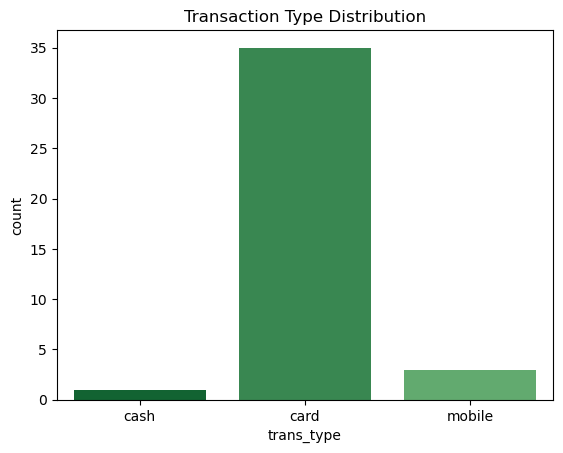

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette to shades of green
sns.set_palette(sns.color_palette("Greens_r"))

# Create the countplot
sns.countplot(x='trans_type', data=df_trans)

# Add title and display the plot
plt.title('Transaction Type Distribution')
plt.show()


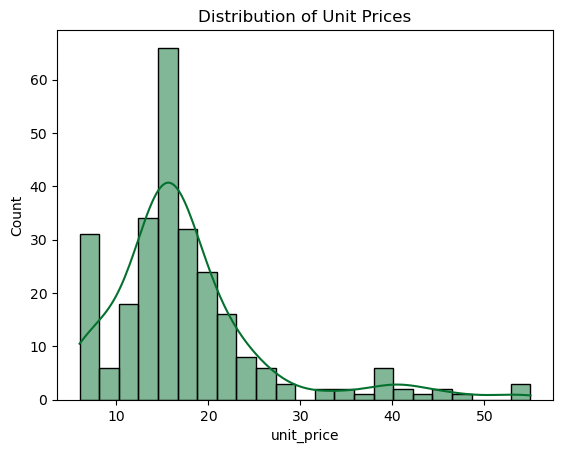

In [43]:
# Histogram for 'unit_price'
sns.histplot(df_item['unit_price'], kde=True)
# Set the color palette to shades of green
sns.set_palette(sns.color_palette("Greens_r"))
plt.title('Distribution of Unit Prices')
plt.show()

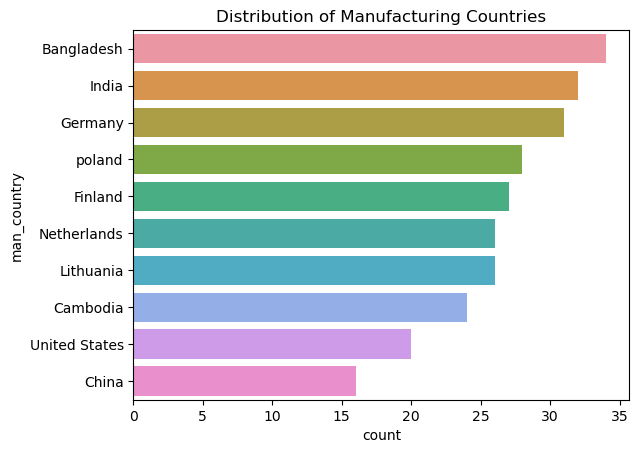

In [44]:
# Count plot for 'man_country'
sns.countplot(y='man_country', data=df_item, order = df_item['man_country'].value_counts().index)
sns.set_palette(sns.color_palette("Greens_r"))
plt.title('Distribution of Manufacturing Countries')
plt.show()

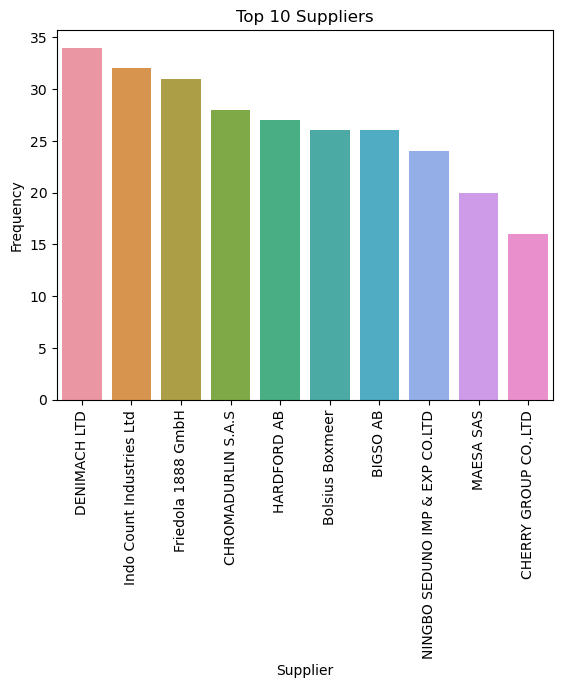

In [45]:
# Count plot for top 10 'supplier'
top_suppliers = df_item['supplier'].value_counts().nlargest(10)
sns.barplot(x=top_suppliers.index, y=top_suppliers)
sns.set_palette(sns.color_palette("Greens_r"))
plt.title('Top 10 Suppliers')
plt.xlabel('Supplier')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


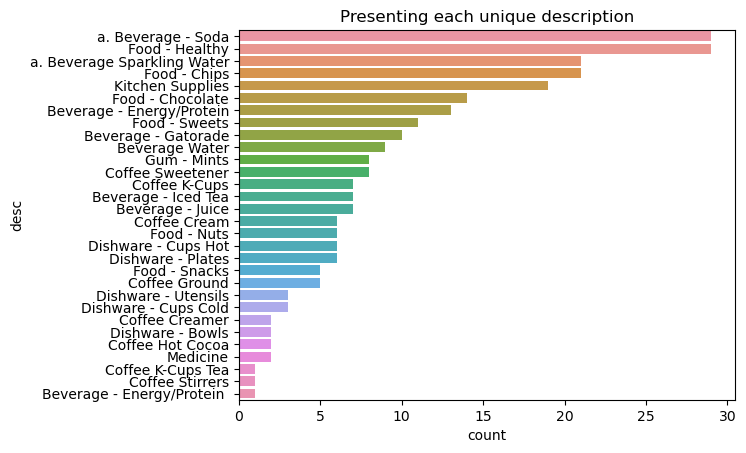

In [47]:
# Count plot for 'description'
sns.countplot(y='desc', data=df_item, order = df_item['desc'].value_counts().index)
sns.set_palette(sns.color_palette("Greens_r"))
plt.title('Presenting each unique description')
plt.show()

In [48]:
# Unique values and value counts for 'division'
print("\nDivisions:", df_store['division'].nunique())
print(df_store['division'].value_counts())

# Unique values and value counts for 'district'
print("\nDistricts:", df_store['district'].nunique())
print(df_store['district'].value_counts())

# Unique values and value counts for 'upazila'
print("\nUpazilas:", df_store['upazila'].nunique())
print(df_store['upazila'].value_counts())


Divisions: 7
division
DHAKA         280
CHITTAGONG    136
RAJSHAHI       84
KHULNA         78
RANGPUR        58
BARISAL        52
SYLHET         38
Name: count, dtype: int64

Districts: 64
district
DHAKA         162
CHITTAGONG     50
KHULNA         28
RAJSHAHI       26
BARISAL        20
             ... 
MADARIPUR       4
MAGURA          4
JHALOKATI       4
MEHERPUR        3
NARAIL          3
Name: count, Length: 64, dtype: int64

Upazilas: 540
upazila
KOTWALI            5
DAULATPUR          4
MIRPUR             4
MOHAMMADPUR        4
NAWABGANJ          4
                  ..
BAGERHAT SADAR     1
ULLAH PARA         1
TARASH             1
SIRAJGANJ SADAR    1
ZIANAGAR           1
Name: count, Length: 540, dtype: int64


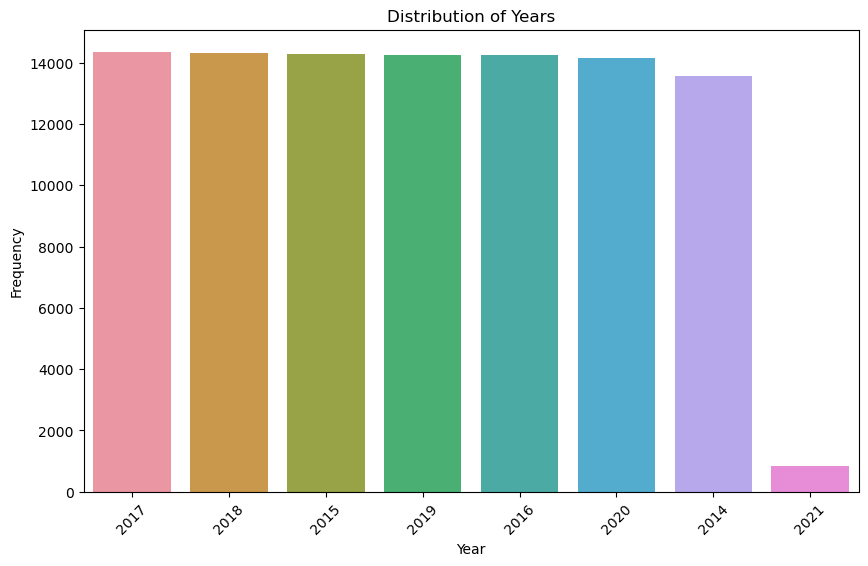

In [49]:
# Creating a bar plot for the distribution of years directly from the DataFrame
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=df_time, order = df_time['year'].value_counts().index)
# Set the color palette to shades of green
sns.set_palette(sns.color_palette("Greens_r"))
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability if necessary
plt.show()

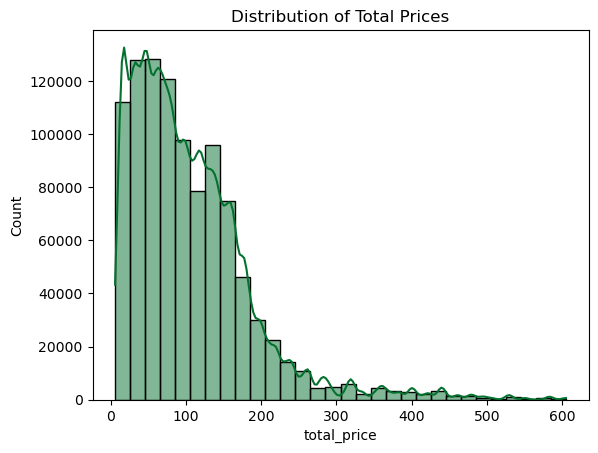

In [50]:
# Set the color palette to shades of green
sns.set_palette(sns.color_palette("Greens_r"))
# Histogram for 'total_price'
sns.histplot(df['total_price'], kde=True, bins=30)
plt.title('Distribution of Total Prices')
plt.show()



# The dataframes are highly usable. They are free of missing values and have passed consistency checks. It seems that the modified dataframes will either retain the structure of the original dataframes or represent subsets tailored to address specific queries.